In [109]:
import glob
import re
import os
import matplotlib.pyplot as plt

In [110]:
def get_mcdinfo(model_infer_dir, ignore_checkpoint_last=False):
    mcd_paths = glob.glob(model_infer_dir + "/**/mcd.txt", recursive=True)
    checkpoint2mcdinfo = {} 

    for p in mcd_paths:
        
        
        checkpointname = os.path.dirname(p).split('/')[-1]
        assert 'checkpoint' in checkpointname
        checkpointnum = checkpointname.lstrip('checkpoint')
        if checkpointnum == '_last': # checkpoint was not called checkpoint_last
            if ignore_checkpoint_last:
                continue
            else:
                checkpointnum = -1 # rename 
        else:
            checkpointnum = int(checkpointnum)
        
        
        with open(p, 'r') as f:
            txt = f.read()
        mcdinfo = {}
        mcdinfo["nutt"] = int(re.findall(r"nutt: (\d+)", txt)[0])
        mcdinfo["dist"] = float(re.findall(r"dist: (\d+\.\d+)", txt)[0])
        mcdinfo["dur_ref"] = int(re.findall(r"dur_ref: (\d+)", txt)[0])
        mcdinfo["dur_syn"] = int(re.findall(r"dur_syn: (\d+)", txt)[0])
        mcdinfo["dur_ali"] = int(re.findall(r"dur_ali: (\d+)", txt)[0])
        mcdinfo["dist_per_ref_frm"] = float(re.findall(r"dist_per_ref_frm: (\d+\.\d+)", txt)[0])
        mcdinfo["dist_per_syn_frm"] = float(re.findall(r"dist_per_syn_frm: (\d+\.\d+)", txt)[0])
        mcdinfo["dist_per_ali_frm"] = float(re.findall(r"dist_per_ali_frm: (\d+\.\d+)", txt)[0])
        mcdinfo["ins"] = float(re.findall(r"ins: (\d+\.\d+)", txt)[0])
        mcdinfo["del"] = float(re.findall(r"del: (\d+\.\d+)", txt)[0])

        checkpoint2mcdinfo[checkpointnum] = mcdinfo
    return sorted(checkpoint2mcdinfo.items())

In [111]:
# use checkpoint2mcdinfo to plot mcd data for the checkpoints

def plot_checkpoint2mcdinfo(checkpoint2mcdinfo, model_name):
    xs = [chkpt_num for chkpt_num, mcdinfo in checkpoint2mcdinfo]
    ys = [mcdinfo["dist_per_ali_frm"] for chkpt_num, mcdinfo in checkpoint2mcdinfo]
    plt.title(f"{model_name} MCD (NB checkpoint -1 is the latest one)")
    plt.plot(xs,ys, marker='o')

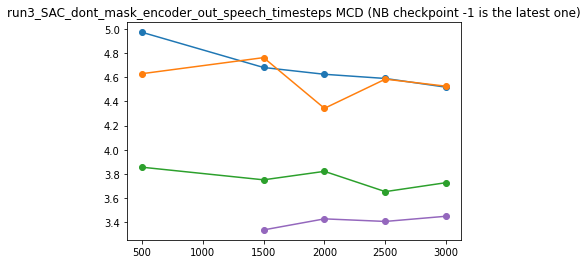

In [113]:
models = [
"run3_SAC_remove_dup_codes", 
"run3_SAC_eos_symbol_in_middle", 
"run3_SAC_one_mask_tok_per_word", 
"run3_SAC_one_mask_tok_per_grapheme", 
"run3_SAC_dont_mask_encoder_out_speech_timesteps", 
]

for model in models:
    model_infer_dir_formatstr = "/home/s1785140/fairseq/inference/{}"
    model_infer_dir = model_infer_dir_formatstr.format(model)
    checkpoint2mcdinfo = get_mcdinfo(model_infer_dir, ignore_checkpoint_last=True)
    plot_checkpoint2mcdinfo(checkpoint2mcdinfo, model)